<a href="https://colab.research.google.com/github/abhiraj860/Dominant-Color-Extraction/blob/main/Dominant_Color_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
img = cv2.imread("/content/sample_data/My image.jpg")
img = cv2.resize(img, (int(img.shape[1] / 4), int(img.shape[0] / 4)))
print(img.shape)
print(int(img.shape[0] / 4))
print(int(img.shape[1] / 4))

(320, 147, 3)
80
36


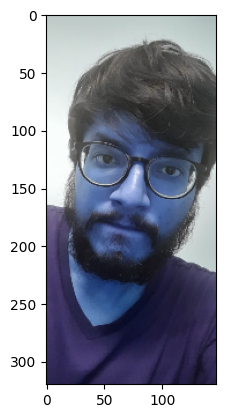

In [ ]:
plt.imshow(img)
plt.show() # BGR format channel by default

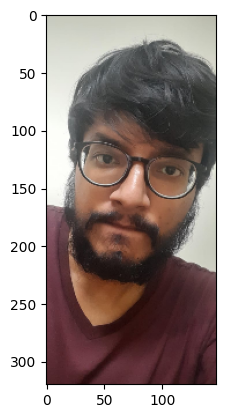

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conver to RGB image
plt.imshow(img)
plt.show()

In [ ]:
X = img.reshape((-1, 3))
print(X.shape)

(47040, 3)


In [ ]:
k = 15
model = KMeans(n_clusters = k)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=15)

In [ ]:
centroids = model.cluster_centers_

In [ ]:
print(centroids)

[[141.23869565  94.89782609  74.51434783]
 [218.48816568 219.89408284 210.38609467]
 [ 72.84639135  36.97124662  39.95542262]
 [184.46897038 154.77926657 139.00282087]
 [ 50.70316027  48.13769752  46.16986456]
 [168.42286292 118.35103692  91.99898837]
 [ 70.40807763  70.0086546   69.47285602]
 [202.62559349 202.90956364 190.78860502]
 [247.61643836 248.88013699 243.30968689]
 [ 92.12949087  50.5364073   53.87512008]
 [ 94.07683904  93.70648216  93.65149308]
 [127.02598187 118.70634441 116.76314199]
 [125.10317003  72.56195965  46.96023055]
 [107.28981243  70.19676352  70.14012505]
 [ 44.46438049  23.25107165  23.09450908]]


In [ ]:
colors = np.array(centroids, dtype='uint8')

In [ ]:
print(colors)

[[141  94  74]
 [218 219 210]
 [ 72  36  39]
 [184 154 139]
 [ 50  48  46]
 [168 118  91]
 [ 70  70  69]
 [202 202 190]
 [247 248 243]
 [ 92  50  53]
 [ 94  93  93]
 [127 118 116]
 [125  72  46]
 [107  70  70]
 [ 44  23  23]]


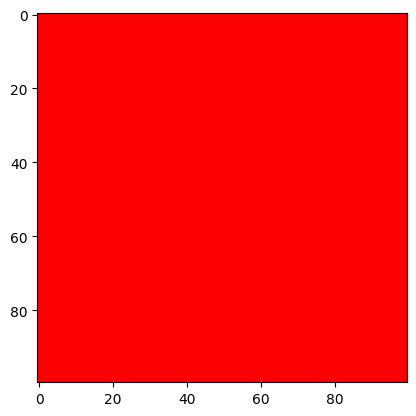

In [ ]:
# Color Patch (100, 100, 3) -> Red Color
mat = np.zeros((100, 100, 3), dtype = 'uint8')
mat[:, :, 0] = 250
plt.imshow(mat)
plt.show()

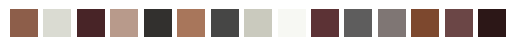

In [ ]:
i = 1
for color in colors:
    # print(color)
    plt.subplot(1, k, i)
    plt.axis("off")
    i = i + 1
    mat = np.zeros((100, 100, 3), dtype = 'uint8')
    mat[:, :, :] = color
    plt.imshow(mat)

plt.show()


In [ ]:
# Basic Segmentation based upon similar color regions
# Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
print(colors)

[[141  94  74]
 [218 219 210]
 [ 72  36  39]
 [184 154 139]
 [ 50  48  46]
 [168 118  91]
 [ 70  70  69]
 [202 202 190]
 [247 248 243]
 [ 92  50  53]
 [ 94  93  93]
 [127 118 116]
 [125  72  46]
 [107  70  70]
 [ 44  23  23]]


In [ ]:
np.unique(model.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int32)

In [ ]:
model.labels_.shape

(47040,)

In [ ]:
newImg = np.zeros((X.shape), dtype = 'uint8')
print(newImg.shape)

(47040, 3)


In [ ]:
for i in range(newImg.shape[0]):
    newImg[i] = colors[model.labels_[i]]

In [ ]:
newImg.shape

(47040, 3)

In [ ]:
newImg = newImg.reshape(img.shape)

In [ ]:
print(newImg.shape)

(320, 147, 3)


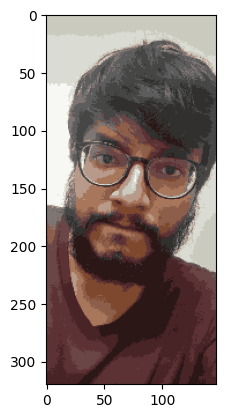

In [ ]:
plt.imshow(newImg)